In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load the Bank Marketing dataset from UCI
bank_marketing = fetch_ucirepo(id=222)

# Separate input features and target variable
X = bank_marketing.data.features
y = bank_marketing.data.targets





In [11]:
# Combine into single DataFrame
df = pd.concat([X, y.squeeze().rename("y")], axis=1)

# Display basic info
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [12]:
# Shape of dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (45211, 17)


In [13]:
# Column names
print("\nColumns:\n", df.columns)


Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [14]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
# Target distribution
df['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [16]:
# Count missing values per column
X.isnull().sum()


age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [17]:
df.dropna(subset=['job'])

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [18]:
categorical_cols = df.select_dtypes(include='object').columns

df[categorical_cols] = df[categorical_cols].fillna("unknown")


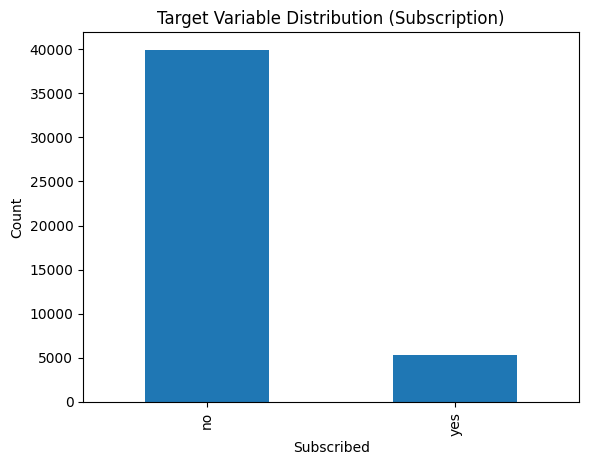

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

In [19]:
import matplotlib.pyplot as plt

# Count plot
df['y'].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution (Subscription)")
plt.xlabel("Subscribed")
plt.ylabel("Count")
plt.show()

# Percentage distribution
df['y'].value_counts(normalize=True) * 100


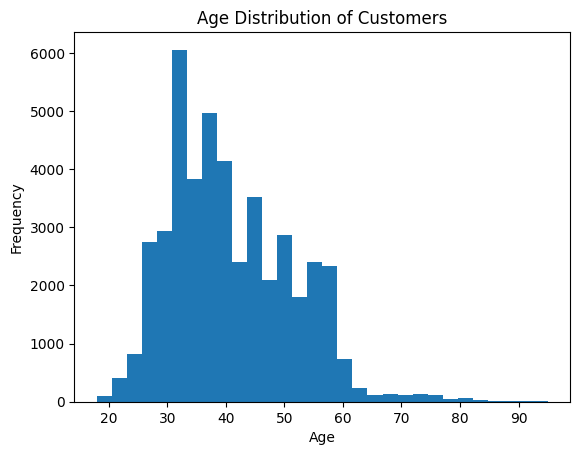

In [20]:
plt.hist(df['age'], bins=30)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


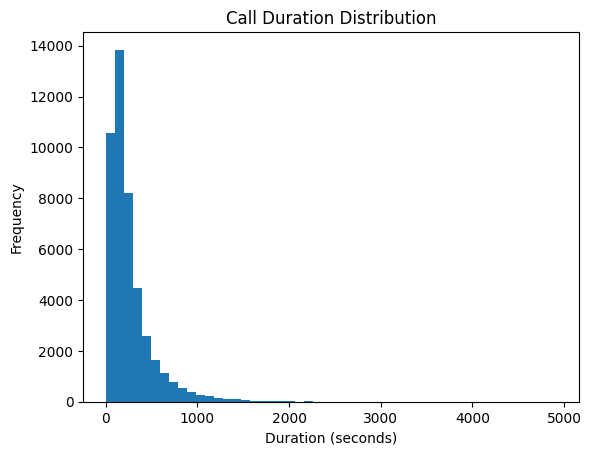

In [21]:
plt.hist(df['duration'], bins=50)
plt.title("Call Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


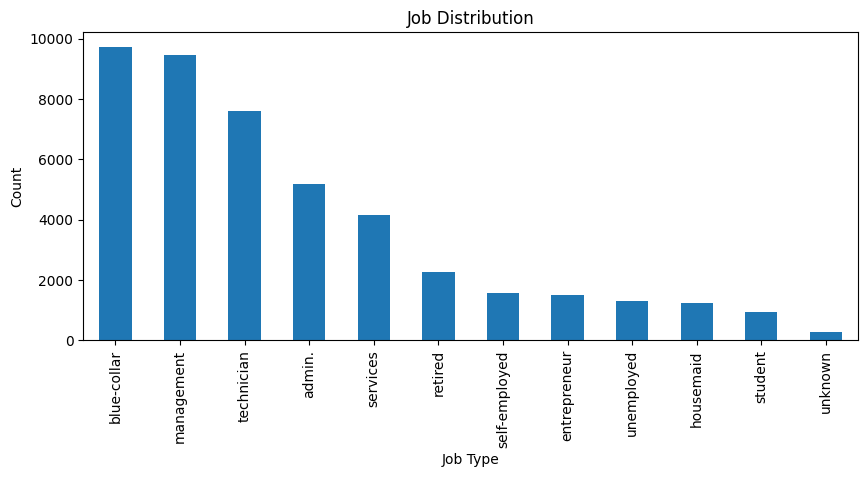

In [22]:
df['job'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Job Distribution")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.show()


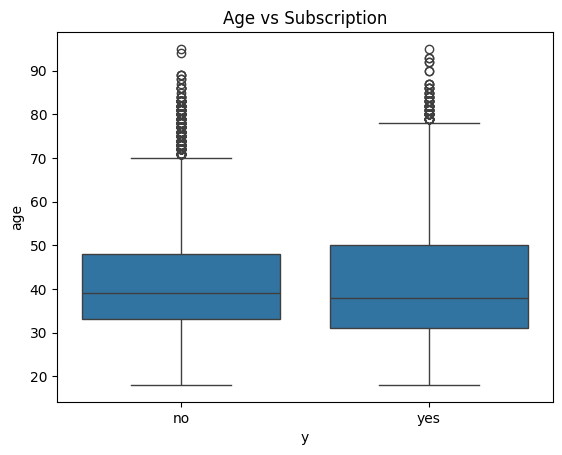

In [23]:
import seaborn as sns

sns.boxplot(x='y', y='age', data=df)
plt.title("Age vs Subscription")
plt.show()


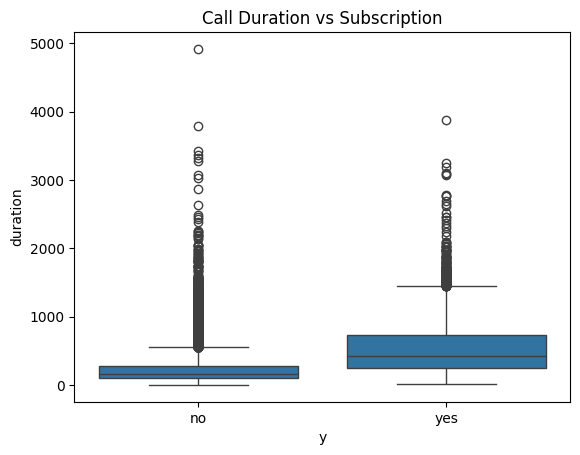

In [24]:
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call Duration vs Subscription")
plt.show()


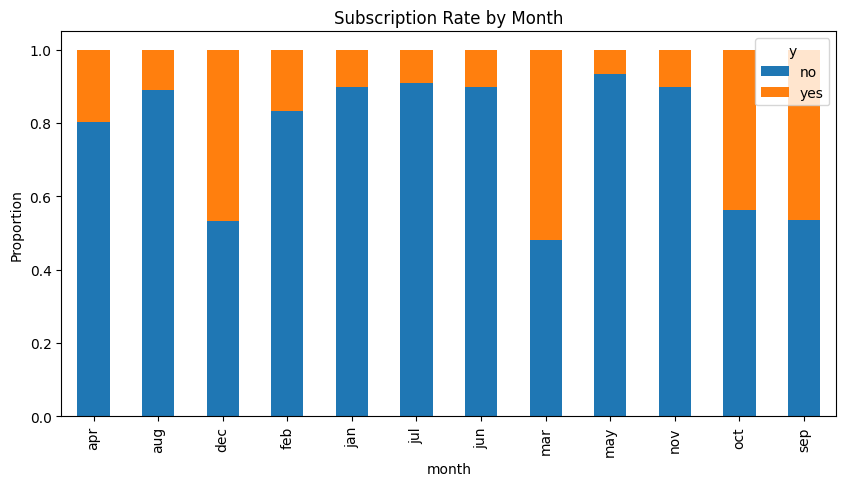

In [25]:
subscription_by_month = pd.crosstab(df['month'], df['y'], normalize='index')
subscription_by_month.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Subscription Rate by Month")
plt.ylabel("Proportion")
plt.show()


The duration feature was removed to prevent data leakage, as it is not available before making a prediction.

In [26]:
df.drop(columns=['duration'], inplace=True)


In [27]:
X = df.drop(columns=['y'])
y = df['y']


In [28]:
y = y.map({'yes': 1, 'no': 0})


In [29]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:

import mlflow
import mlflow.sklearn

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def log_metrics(y_true, y_pred, y_prob):
    return {
        "precision_yes": precision_score(y_true, y_pred),
        "recall_yes": recall_score(y_true, y_pred),
        "f1_yes": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_prob)
    }


In [33]:
from sklearn.linear_model import LogisticRegression


with mlflow.start_run(run_name="Logistic_Regression_Baseline"):

    log_reg = LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    )

    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)
    y_prob = log_reg.predict_proba(X_test)[:, 1]

    metrics = log_metrics(y_test, y_pred, y_prob)

    # Log parameters
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("class_weight", "balanced")

    # Log metrics
    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    # Log model
    mlflow.sklearn.log_model(log_reg, "model")


c:\Users\kirta\miniconda3\envs\mlflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2026/01/18 16:14:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/18 16:15:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


applying SMOTE (Synthetic Minority Over-sampling) for balancing data 

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


c:\Users\kirta\miniconda3\envs\mlflow_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [49]:
with mlflow.start_run(run_name="Logistic_Regression_SMOTE"):

    log_reg_smote = LogisticRegression(max_iter=1000)

    log_reg_smote.fit(X_train_smote, y_train_smote)

    y_pred = log_reg_smote.predict(X_test)
    y_prob = log_reg_smote.predict_proba(X_test)[:, 1]

    metrics = log_metrics(y_test, y_pred, y_prob)

    mlflow.log_param("model", "LogisticRegression_SMOTE")

    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    mlflow.sklearn.log_model(log_reg_smote, "model")


c:\Users\kirta\miniconda3\envs\mlflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2026/01/18 16:34:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/18 16:35:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model 1: Random Forest (Strong Baseline)

In [50]:
with mlflow.start_run(run_name="Random_Forest"):

    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=50,
        class_weight="balanced",
        random_state=42
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]

    metrics = log_metrics(y_test, y_pred, y_prob)

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 300)
    mlflow.log_param("max_depth", 10)

    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    mlflow.sklearn.log_model(rf, "model")


2026/01/18 16:35:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/18 16:35:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model 2: Gradient Boosting (BEST for this dataset)

In [51]:
with mlflow.start_run(run_name="Gradient_Boosting_Final"):

    gb = GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )

    gb.fit(X_train, y_train)

    y_pred = gb.predict(X_test)
    y_prob = gb.predict_proba(X_test)[:, 1]

    metrics = log_metrics(y_test, y_pred, y_prob)

    mlflow.log_param("model", "GradientBoosting")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("max_depth", 3)

    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    mlflow.sklearn.log_model(gb, "model")


2026/01/18 16:36:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/18 16:36:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [52]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(gb, "models/gb_model.pkl")


['models/gb_model.pkl']

In [53]:
joblib.dump(X_train.columns.tolist(), "models/feature_columns.pkl")


['models/feature_columns.pkl']

In [54]:
joblib.dump(0.30, "models/business_threshold.pkl")


['models/business_threshold.pkl']